In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('final_output_kmeans_imputed.csv')

In [5]:
df.head()

,Age,Age_x,Age_y,Education,Gender,House Loan,Income,Marrital Status,No of Dependents,Personal loan,Price,Profession,Salary,Total Salary,Wife Salary,Wife Working,age_max,age_min,income_max,income_min
0,45-60,31-37,31.0,Graduate,Female,Yes,500001 - 1000000,Married,3.0,Yes,700000.0,Business,900000.0,1300000.0,400000.0,Yes,37.0,31.0,1000000.0,500001.0
1,45-60,31-37,35.0,Post Graduate,Female,No,500001 - 1000000,Married,4.0,No,700000.0,Business,900000.0,1400000.0,500000.0,Yes,37.0,31.0,1000000.0,500001.0
2,45-60,38-44,41.0,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,700000.0,Business,1100000.0,1100000.0,0.0,No,44.0,38.0,1500000.0,1000001.0
3,45-60,38-44,41.0,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1300000.0,Salaried,1400000.0,2100000.0,700000.0,Yes,44.0,38.0,1500000.0,1000001.0
4,45-60,38-44,43.0,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1500000.0,Business,1300000.0,2200000.0,900000.0,Yes,44.0,38.0,1500000.0,1000001.0


In [6]:
df['Age_y'] = df['Age_y'].astype('int')

In [7]:
df

,Age,Age_x,Age_y,Education,Gender,House Loan,Income,Marrital Status,No of Dependents,Personal loan,Price,Profession,Salary,Total Salary,Wife Salary,Wife Working,age_max,age_min,income_max,income_min
0,45-60,31-37,31,Graduate,Female,Yes,500001 - 1000000,Married,3.0,Yes,700000.0,Business,900000.0,1300000.0,400000.0,Yes,37.0,31.0,1000000.0,500001.0
1,45-60,31-37,35,Post Graduate,Female,No,500001 - 1000000,Married,4.0,No,700000.0,Business,900000.0,1400000.0,500000.0,Yes,37.0,31.0,1000000.0,500001.0
2,45-60,38-44,41,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,700000.0,Business,1100000.0,1100000.0,0.0,No,44.0,38.0,1500000.0,1000001.0
3,45-60,38-44,41,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1300000.0,Salaried,1400000.0,2100000.0,700000.0,Yes,44.0,38.0,1500000.0,1000001.0
4,45-60,38-44,43,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1500000.0,Business,1300000.0,2200000.0,900000.0,Yes,44.0,38.0,1500000.0,1000001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,36,31-37,45,Post Graduate,Female,Yes,1500001 - 3000000,Married,3.0,Yes,1600000.0,Salaried,3100000.0,4900000.0,1800000.0,Yes,60.0,45.0,3000000.0,1500001.0
3872,41,31-37,42,Post Graduate,Female,Yes,1500001 - 3000000,Married,3.0,Yes,1500000.0,Salaried,3100000.0,3100000.0,0.0,No,44.0,38.0,3000000.0,1500001.0
3873,44,31-37,42,Post Graduate,Female,No,1500001 - 3000000,Married,3.0,No,1500000.0,Salaried,3100000.0,3100000.0,0.0,No,44.0,38.0,3000000.0,1500001.0
3874,44,31-37,45,Graduate,Female,No,1500001 - 3000000,Married,2.0,No,1600000.0,Business,3100000.0,5200000.0,2100000.0,Yes,60.0,45.0,3000000.0,1500001.0


In [8]:
df.drop(columns=['Age','Age_x','age_max','age_min'], inplace=True)

In [9]:
df.head()

,Age_y,Education,Gender,House Loan,Income,Marrital Status,No of Dependents,Personal loan,Price,Profession,Salary,Total Salary,Wife Salary,Wife Working,income_max,income_min
0,31,Graduate,Female,Yes,500001 - 1000000,Married,3.0,Yes,700000.0,Business,900000.0,1300000.0,400000.0,Yes,1000000.0,500001.0
1,35,Post Graduate,Female,No,500001 - 1000000,Married,4.0,No,700000.0,Business,900000.0,1400000.0,500000.0,Yes,1000000.0,500001.0
2,41,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,700000.0,Business,1100000.0,1100000.0,0.0,No,1500000.0,1000001.0
3,41,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1300000.0,Salaried,1400000.0,2100000.0,700000.0,Yes,1500000.0,1000001.0
4,43,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1500000.0,Business,1300000.0,2200000.0,900000.0,Yes,1500000.0,1000001.0


In [10]:
df.rename(columns={'Age_y': 'Age'}, inplace=True)

In [11]:
df

,Age,Education,Gender,House Loan,Income,Marrital Status,No of Dependents,Personal loan,Price,Profession,Salary,Total Salary,Wife Salary,Wife Working,income_max,income_min
0,31,Graduate,Female,Yes,500001 - 1000000,Married,3.0,Yes,700000.0,Business,900000.0,1300000.0,400000.0,Yes,1000000.0,500001.0
1,35,Post Graduate,Female,No,500001 - 1000000,Married,4.0,No,700000.0,Business,900000.0,1400000.0,500000.0,Yes,1000000.0,500001.0
2,41,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,700000.0,Business,1100000.0,1100000.0,0.0,No,1500000.0,1000001.0
3,41,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1300000.0,Salaried,1400000.0,2100000.0,700000.0,Yes,1500000.0,1000001.0
4,43,Graduate,Male,No,1000001 - 1500000,Married,3.0,No,1500000.0,Business,1300000.0,2200000.0,900000.0,Yes,1500000.0,1000001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Yes,1500001 - 3000000,Married,3.0,Yes,1600000.0,Salaried,3100000.0,4900000.0,1800000.0,Yes,3000000.0,1500001.0
3872,42,Post Graduate,Female,Yes,1500001 - 3000000,Married,3.0,Yes,1500000.0,Salaried,3100000.0,3100000.0,0.0,No,3000000.0,1500001.0
3873,42,Post Graduate,Female,No,1500001 - 3000000,Married,3.0,No,1500000.0,Salaried,3100000.0,3100000.0,0.0,No,3000000.0,1500001.0
3874,45,Graduate,Female,No,1500001 - 3000000,Married,2.0,No,1600000.0,Business,3100000.0,5200000.0,2100000.0,Yes,3000000.0,1500001.0


In [12]:
df.drop(columns=['Income','income_max','income_min'], inplace=True)

In [13]:
df.rename(columns={'Salary': 'Income','Total Salary':'Total Income'}, inplace=True)

In [ ]:
df.head()

,Age,Education,Gender,House Loan,Marrital Status,No of Dependents,Personal loan,Price,Profession,Income,Total Income,Wife Salary,Wife Working
0,31,Graduate,Female,Yes,Married,3.0,Yes,700000.0,Business,900000.0,1300000.0,400000.0,Yes
1,35,Post Graduate,Female,No,Married,4.0,No,700000.0,Business,900000.0,1400000.0,500000.0,Yes
2,41,Graduate,Male,No,Married,3.0,No,700000.0,Business,1100000.0,1100000.0,0.0,No
3,41,Graduate,Male,No,Married,3.0,No,1300000.0,Salaried,1400000.0,2100000.0,700000.0,Yes
4,43,Graduate,Male,No,Married,3.0,No,1500000.0,Business,1300000.0,2200000.0,900000.0,Yes


In [20]:
df[df['Wife Working']=='Yes']

,Age,Education,Gender,House Loan,Marrital Status,No of Dependents,Personal loan,Price,Profession,Income,Total Income,Wife Salary,Wife Working
0,31,Graduate,Female,Yes,Married,3.0,Yes,700000.0,Business,900000.0,1300000.0,400000.0,Yes
1,35,Post Graduate,Female,No,Married,4.0,No,700000.0,Business,900000.0,1400000.0,500000.0,Yes
3,41,Graduate,Male,No,Married,3.0,No,1300000.0,Salaried,1400000.0,2100000.0,700000.0,Yes
4,43,Graduate,Male,No,Married,3.0,No,1500000.0,Business,1300000.0,2200000.0,900000.0,Yes
7,29,Post Graduate,Female,No,Married,0.0,No,110000.0,Salaried,900000.0,1700000.0,800000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,41,Post Graduate,Female,No,Married,3.0,No,1260000.0,Salaried,1300000.0,1940000.0,640000.0,Yes
3870,41,Post Graduate,Male,No,Married,3.0,No,1260000.0,Salaried,1300000.0,1940000.0,640000.0,Yes
3871,45,Post Graduate,Female,Yes,Married,3.0,Yes,1600000.0,Salaried,3100000.0,4900000.0,1800000.0,Yes
3874,45,Graduate,Female,No,Married,2.0,No,1600000.0,Business,3100000.0,5200000.0,2100000.0,Yes


In [31]:
df.drop(columns=['House Loan','Personal loan','Price'], inplace=True)

In [32]:
df.to_csv('final_output_kmeans_imputed.csv', index=False)

In [33]:
df.head()

,Age,Education,Gender,Marrital Status,No of Dependents,Profession,Income,Total Income,Wife Salary,Wife Working
0,31,Graduate,Female,Married,3.0,Business,900000.0,1300000.0,400000.0,Yes
1,35,Post Graduate,Female,Married,4.0,Business,900000.0,1400000.0,500000.0,Yes
2,41,Graduate,Male,Married,3.0,Business,1100000.0,1100000.0,0.0,No
3,41,Graduate,Male,Married,3.0,Salaried,1400000.0,2100000.0,700000.0,Yes
4,43,Graduate,Male,Married,3.0,Business,1300000.0,2200000.0,900000.0,Yes


In [34]:
df

,Age,Education,Gender,Marrital Status,No of Dependents,Profession,Income,Total Income,Wife Salary,Wife Working
0,31,Graduate,Female,Married,3.0,Business,900000.0,1300000.0,400000.0,Yes
1,35,Post Graduate,Female,Married,4.0,Business,900000.0,1400000.0,500000.0,Yes
2,41,Graduate,Male,Married,3.0,Business,1100000.0,1100000.0,0.0,No
3,41,Graduate,Male,Married,3.0,Salaried,1400000.0,2100000.0,700000.0,Yes
4,43,Graduate,Male,Married,3.0,Business,1300000.0,2200000.0,900000.0,Yes
...,...,...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Married,3.0,Salaried,3100000.0,4900000.0,1800000.0,Yes
3872,42,Post Graduate,Female,Married,3.0,Salaried,3100000.0,3100000.0,0.0,No
3873,42,Post Graduate,Female,Married,3.0,Salaried,3100000.0,3100000.0,0.0,No
3874,45,Graduate,Female,Married,2.0,Business,3100000.0,5200000.0,2100000.0,Yes


In [37]:
df['Income'] = df['Income'].astype('int')
df['Total Income'] = df['Total Income'].astype('int')
df['Wife Salary'] = df['Wife Salary'].astype('int')
df['No of Dependents'] = df['No of Dependents'].astype('int')

In [38]:
df

,Age,Education,Gender,Marrital Status,No of Dependents,Profession,Income,Total Income,Wife Salary,Wife Working
0,31,Graduate,Female,Married,3,Business,900000,1300000,400000,Yes
1,35,Post Graduate,Female,Married,4,Business,900000,1400000,500000,Yes
2,41,Graduate,Male,Married,3,Business,1100000,1100000,0,No
3,41,Graduate,Male,Married,3,Salaried,1400000,2100000,700000,Yes
4,43,Graduate,Male,Married,3,Business,1300000,2200000,900000,Yes
...,...,...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Married,3,Salaried,3100000,4900000,1800000,Yes
3872,42,Post Graduate,Female,Married,3,Salaried,3100000,3100000,0,No
3873,42,Post Graduate,Female,Married,3,Salaried,3100000,3100000,0,No
3874,45,Graduate,Female,Married,2,Business,3100000,5200000,2100000,Yes


In [42]:
df.drop(columns=['Wife Working','No of Dependents'], inplace=True)

In [43]:
df.to_csv('final_output_kmeans_imputed.csv', index = False)

In [45]:
df = pd.read_csv('final_output_kmeans_imputed.csv')

In [46]:
df

,Age,Education,Gender,Marrital Status,Profession,Income,Wife Salary,Total Income
0,31,Graduate,Female,Married,Business,900000,400000,1300000
1,35,Post Graduate,Female,Married,Business,900000,500000,1400000
2,41,Graduate,Male,Married,Business,1100000,0,1100000
3,41,Graduate,Male,Married,Salaried,1400000,700000,2100000
4,43,Graduate,Male,Married,Business,1300000,900000,2200000
...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Married,Salaried,3100000,1800000,4900000
3872,42,Post Graduate,Female,Married,Salaried,3100000,0,3100000
3873,42,Post Graduate,Female,Married,Salaried,3100000,0,3100000
3874,45,Graduate,Female,Married,Business,3100000,2100000,5200000


In [53]:
df['Income'] = df['Income'].astype('int')
df['Wife Salary'] = df['Wife Salary'].astype('int') 
df['Total Income'] = df['Total Income'].astype('int')

In [54]:
df['Income'] = df['Income']*100
df['Wife Salary'] = df['Wife Salary']*10
df['Total Income'] = df['Total Income']*10

In [55]:
df

,Age,Education,Gender,Marrital Status,Profession,Income,Wife Salary,Total Income
0,31,Graduate,Female,Married,Business,90000,40000,130000
1,35,Post Graduate,Female,Married,Business,90000,50000,140000
2,41,Graduate,Male,Married,Business,110000,0,110000
3,41,Graduate,Male,Married,Salaried,140000,70000,210000
4,43,Graduate,Male,Married,Business,130000,90000,220000
...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Married,Salaried,310000,180000,490000
3872,42,Post Graduate,Female,Married,Salaried,310000,0,310000
3873,42,Post Graduate,Female,Married,Salaried,310000,0,310000
3874,45,Graduate,Female,Married,Business,310000,210000,520000


In [3]:
df = pd.read_csv('final_output_kmeans_imputed.csv')

In [4]:
df

,Age,Education,Gender,Marrital Status,Profession,Income,Wife Salary,Total Income
0,31,Graduate,Female,Married,Business,900000,400000,1300000
1,35,Post Graduate,Female,Married,Business,900000,500000,1400000
2,41,Graduate,Male,Married,Business,1100000,0,1100000
3,41,Graduate,Male,Married,Salaried,1400000,700000,2100000
4,43,Graduate,Male,Married,Business,1300000,900000,2200000
...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Married,Salaried,3100000,1800000,4900000
3872,42,Post Graduate,Female,Married,Salaried,3100000,0,3100000
3873,42,Post Graduate,Female,Married,Salaried,3100000,0,3100000
3874,45,Graduate,Female,Married,Business,3100000,2100000,5200000


Original Columns: ['Age', 'Education', 'Gender', 'Marrital Status', 'Profession', 'Income', 'Wife Salary', 'Total Income', 'Age_Bracket', 'Income_Bracket', 'Wife_Earning_Flag', 'Education_Code', 'Gender_Code', 'Marital_Code', 'Profession_Code', 'Age_Bracket_Code', 'Income_Bracket_Code', 'Cluster_Label']
   Age      Education  Gender Marrital Status Profession   Income  \
0   31       Graduate  Female         Married   Business   900000   
1   35  Post Graduate  Female         Married   Business   900000   
2   41       Graduate    Male         Married   Business  1100000   
3   41       Graduate    Male         Married   Salaried  1400000   
4   43       Graduate    Male         Married   Business  1300000   

   Wife Salary  Total Income Age_Bracket Income_Bracket  Wife_Earning_Flag  \
0       400000       1300000       25-34         10-20L                  1   
1       500000       1400000       35-44         10-20L                  1   
2            0       1100000       35-44      

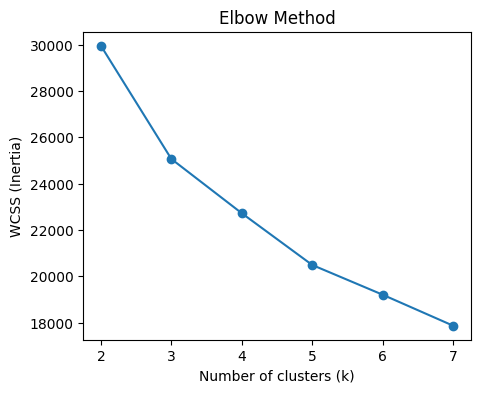

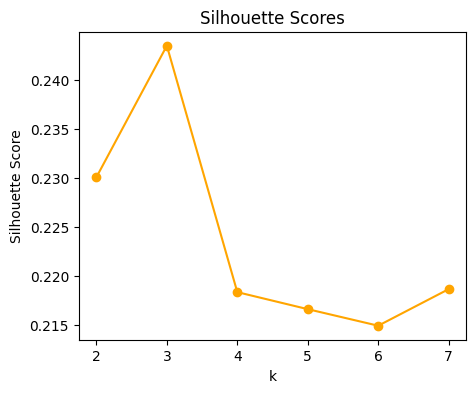


=== Cluster Centroids (approximate means of each feature) ===
         Age  Education_Code  Gender_Code  Marital_Code  Profession_Code  \
0  35.913327        0.577655     0.375752 -3.885781e-16         0.721944   
1  40.308807        0.421405     0.391304 -5.551115e-17         0.622074   
2  30.088505        0.723296     0.392675  6.022380e-01         0.614446   

   Total Income   Wife Salary  Wife_Earning_Flag  Age_Bracket_Code  \
0  2.561764e+06  9.517936e+05       1.000000e+00          0.688878   
1  1.891973e+06 -8.731149e-10      -1.110223e-15          1.161650   
2  1.185758e+06 -8.731149e-10      -1.110223e-15          0.105799   

   Income_Bracket_Code  Cluster_Label  
0             0.650802              0  
1             0.528428              1  
2             0.984741              2  

--- Cluster 0 Profile (n = 1996) ---
Age_Bracket distribution:
Age_Bracket
35-44    0.57
25-34    0.37
45-54    0.06
<25      0.00
55+      0.00
Name: proportion, dtype: float64
Income_Brack

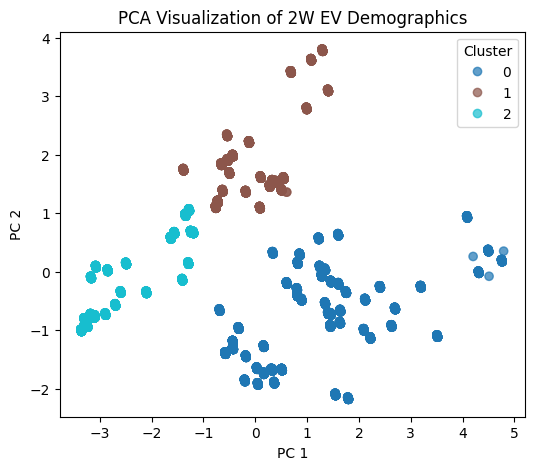


Saved the segmented dataset with cluster labels to: final_output_with_clusters.csv


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------
#  Step 1:  Load your modeled dataset
# ------------------------------------------------------------------------------------


# Quick sanity check
print("Original Columns:", df.columns.tolist())
print(df.head())
print(df.dtypes)

# ------------------------------------------------------------------------------------
#  Step 2:  Create Derived Columns
#  a) Age_Bracket (binned)
#  b) Income_Bracket  (binned on Total Income)
#  c) Wife_Earning_Flag
# ------------------------------------------------------------------------------------

# 2a) Age_Bracket: define bins and labels
bins_age = [0, 24, 34, 44, 54, 100]
labels_age = ["<25", "25-34", "35-44", "45-54", "55+"]
df["Age_Bracket"] = pd.cut(df["Age"], bins=bins_age, labels=labels_age)

# 2b) Income_Bracket: bin Total Income (INR) into roughly 5 categories
#     Adjust these cut-offs if your data requires different scales
bins_income = [0, 300000, 600000, 1000000, 2000000, df["Total Income"].max() + 1]
labels_income = ["<3L", "3-6L", "6-10L", "10-20L", "20L+"]
df["Income_Bracket"] = pd.cut(df["Total Income"], bins=bins_income, labels=labels_income)

# 2c) Wife_Earning_Flag: 1 if wife has any salary, else 0
df["Wife_Earning_Flag"] = df["Wife Salary"].apply(lambda x: 1 if x > 0 else 0)

# ------------------------------------------------------------------------------------
#  Step 3:  Encode Categorical Variables (LabelEncoder)
#  We will encode: Education, Gender, Marrital Status, Profession,
#                 Age_Bracket, Income_Bracket
# ------------------------------------------------------------------------------------

# Initialize LabelEncoders for each categorical column
le_edu = LabelEncoder()
le_gen = LabelEncoder()
le_mar = LabelEncoder()
le_prof = LabelEncoder()
le_ab  = LabelEncoder()  # Age_Bracket
le_ib  = LabelEncoder()  # Income_Bracket

# Fit + transform
df["Education_Code"]     = le_edu.fit_transform(df["Education"].astype(str))
df["Gender_Code"]        = le_gen.fit_transform(df["Gender"].astype(str))
df["Marital_Code"]       = le_mar.fit_transform(df["Marrital Status"].astype(str))
df["Profession_Code"]    = le_prof.fit_transform(df["Profession"].astype(str))
df["Age_Bracket_Code"]   = le_ab.fit_transform(df["Age_Bracket"].astype(str))
df["Income_Bracket_Code"] = le_ib.fit_transform(df["Income_Bracket"].astype(str))

# ------------------------------------------------------------------------------------
#  Step 4:  Select Feature Columns for Clustering
#  We will use both continuous and derived/encoded columns:
#     - Age (continuous)
#     - Education_Code, Gender_Code, Marital_Code, Profession_Code (encoded)
#     - Total Income (continuous)
#     - Wife Salary (continuous)
#     - Wife_Earning_Flag (binary)
#     - Age_Bracket_Code, Income_Bracket_Code (encoded)
# ------------------------------------------------------------------------------------

feature_cols = [
    "Age",
    "Education_Code",
    "Gender_Code",
    "Marital_Code",
    "Profession_Code",
    "Total Income",
    "Wife Salary",
    "Wife_Earning_Flag",
    "Age_Bracket_Code",
    "Income_Bracket_Code"
]

X = df[feature_cols].copy()

# ------------------------------------------------------------------------------------
#  Step 5:  Scale All Features (zero mean, unit variance)
# ------------------------------------------------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------------------------------------------------
#  Step 6:  Determine Optimal k and Run K-Means (if not already done)
#  You can comment out the “determine k” block if you already know k and want to skip.
# ------------------------------------------------------------------------------------

# # -------- OPTIONAL: Use Elbow Method to pick k --------
wcss = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
plt.figure(figsize=(5, 4))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.show()
#
# # -------- OPTIONAL: Use Silhouette Score to confirm --------
from sklearn.metrics import silhouette_score
sil_scores = []
for k in K_range:
    km_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = km_temp.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels_temp))
plt.figure(figsize=(5, 4))
plt.plot(K_range, sil_scores, marker="o", color="orange")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()
#
# # After inspecting the above, pick the “optimal_k” accordingly.

# For the sake of this example, let’s assume you choose k = 3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster_Label"] = kmeans.fit_predict(X_scaled)

# ------------------------------------------------------------------------------------
#  Step 7:  Profile Each Cluster
#  - Print cluster centroids (approximate means in original units)
#  - Show how each demographic category is distributed in each cluster
# ------------------------------------------------------------------------------------

# (a) Convert centroids back to original scale for interpretability
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

centroid_df = pd.DataFrame(centroids_original, columns=feature_cols)
centroid_df["Cluster_Label"] = range(optimal_k)
print("\n=== Cluster Centroids (approximate means of each feature) ===")
print(centroid_df)

# (b) Detailed categorical breakdown for each cluster
for c in range(optimal_k):
    print(f"\n--- Cluster {c} Profile (n = {len(df[df['Cluster_Label']==c])}) ---")
    sub = df[df["Cluster_Label"] == c]
    # Age_Bracket distribution
    print("Age_Bracket distribution:")
    print(sub["Age_Bracket"].value_counts(normalize=True).round(2))
    # Income_Bracket distribution
    print("Income_Bracket distribution:")
    print(sub["Income_Bracket"].value_counts(normalize=True).round(2))
    # Top 3 Professions in this cluster
    print("Top Professions:")
    print(sub["Profession"].value_counts().head(3))
    # Education levels
    print("Education distribution:")
    print(sub["Education"].value_counts(normalize=True).round(2))
    # Gender distribution
    print("Gender distribution:")
    print(sub["Gender"].value_counts(normalize=True).round(2))
    # Marital status distribution
    print("Marital Status distribution:")
    print(sub["Marrital Status"].value_counts(normalize=True).round(2))
    # Wife_Earning_Flag
    print("Wife_Earning_Flag (1 = Yes) distribution:")
    print(sub["Wife_Earning_Flag"].value_counts(normalize=True).round(2))

# ------------------------------------------------------------------------------------
#  Step 8:  (Optional) Visualize Segments in 2D via PCA
# ------------------------------------------------------------------------------------

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df["Cluster_Label"],
    cmap="tab10",
    alpha=0.7
)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Visualization of 2W EV Demographics")
plt.show()

# ------------------------------------------------------------------------------------
#  Step 9:  Save the DataFrame with Cluster Labels
# ------------------------------------------------------------------------------------

output_path = "final_output_with_clusters.csv"
df.to_csv(output_path, index=False)
print(f"\nSaved the segmented dataset with cluster labels to: {output_path}")


In [7]:
df2 = pd.read_csv('final_output_with_clusters.csv')

In [8]:
df2

,Age,Education,Gender,Marrital Status,Profession,Income,Wife Salary,Total Income,Age_Bracket,Income_Bracket,Wife_Earning_Flag,Education_Code,Gender_Code,Marital_Code,Profession_Code,Age_Bracket_Code,Income_Bracket_Code,Cluster_Label
0,31,Graduate,Female,Married,Business,900000,400000,1300000,25-34,10-20L,1,0,0,0,0,0,0,0
1,35,Post Graduate,Female,Married,Business,900000,500000,1400000,35-44,10-20L,1,1,0,0,0,1,0,0
2,41,Graduate,Male,Married,Business,1100000,0,1100000,35-44,10-20L,0,0,1,0,0,1,0,1
3,41,Graduate,Male,Married,Salaried,1400000,700000,2100000,35-44,20L+,1,0,1,0,1,1,1,0
4,43,Graduate,Male,Married,Business,1300000,900000,2200000,35-44,20L+,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3871,45,Post Graduate,Female,Married,Salaried,3100000,1800000,4900000,45-54,20L+,1,1,0,0,1,2,1,0
3872,42,Post Graduate,Female,Married,Salaried,3100000,0,3100000,35-44,20L+,0,1,0,0,1,1,1,1
3873,42,Post Graduate,Female,Married,Salaried,3100000,0,3100000,35-44,20L+,0,1,0,0,1,1,1,1
3874,45,Graduate,Female,Married,Business,3100000,2100000,5200000,45-54,20L+,1,0,0,0,0,2,1,0


In [10]:
# Count of records per cluster
cluster_counts = df["Cluster_Label"].value_counts().sort_index()

# Percentage of total records in each cluster
cluster_percent = (cluster_counts / len(df) * 100).round(2)

cluster_summary = pd.DataFrame({
    "Count": cluster_counts,
    "Percent_of_Total": cluster_percent
})
print("\n=== Cluster Size & Share ===")
print(cluster_summary)



=== Cluster Size & Share ===
               Count  Percent_of_Total
Cluster_Label                         
0               1996             51.50
1                897             23.14
2                983             25.36


In [12]:
income_stats = df.groupby("Cluster_Label")["Total Income"].agg(
    Mean_Total_Income="mean",
    Median_Total_Income="median",
    Std_Total_Income="std"
).round(2)

print("\n=== Total Income Statistics by Cluster ===")
print(income_stats)



=== Total Income Statistics by Cluster ===
               Mean_Total_Income  Median_Total_Income  Std_Total_Income
Cluster_Label                                                          
0                     2561763.53            2300000.0         891535.07
1                     1891973.24            1900000.0         625858.52
2                     1185757.88            1100000.0         530189.04


In [13]:
income_bracket_dist = (
    df.groupby(["Cluster_Label", "Income_Bracket"])
      .size()
      .unstack(fill_value=0)
)

# Convert to percentages within each cluster
income_bracket_pct = income_bracket_dist.div(income_bracket_dist.sum(axis=1), axis=0).round(2)

print("\n=== Income-Bracket Distribution by Cluster (Counts) ===")
print(income_bracket_dist)

print("\n=== Income-Bracket Distribution by Cluster (Pct) ===")
print(income_bracket_pct)



=== Income-Bracket Distribution by Cluster (Counts) ===
Income_Bracket  <3L  3-6L  6-10L  10-20L  20L+
Cluster_Label                                 
0                 0     0      0     697  1299
1                38     0      0     499   360
2               104     0    315     538    26

=== Income-Bracket Distribution by Cluster (Pct) ===
Income_Bracket   <3L  3-6L  6-10L  10-20L  20L+
Cluster_Label                                  
0               0.00   0.0   0.00    0.35  0.65
1               0.04   0.0   0.00    0.56  0.40
2               0.11   0.0   0.32    0.55  0.03


C:\Users\HP\AppData\Local\Temp\ipykernel_22120\2254455128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Cluster_Label", "Income_Bracket"])


In [14]:
age_stats = df.groupby("Cluster_Label")["Age"].agg(
    Mean_Age="mean",
    Median_Age="median",
    Std_Age="std"
).round(2)

print("\n=== Age Statistics by Cluster ===")
print(age_stats)



=== Age Statistics by Cluster ===
               Mean_Age  Median_Age  Std_Age
Cluster_Label                               
0                 35.91        35.0     4.78
1                 40.31        39.0     4.63
2                 30.09        30.0     3.00


In [15]:
age_bracket_dist = (
    df.groupby(["Cluster_Label", "Age_Bracket"])
      .size()
      .unstack(fill_value=0)
)

age_bracket_pct = age_bracket_dist.div(age_bracket_dist.sum(axis=1), axis=0).round(2)

print("\n=== Age-Bracket Counts by Cluster ===")
print(age_bracket_dist)

print("\n=== Age-Bracket Percentages by Cluster ===")
print(age_bracket_pct)



=== Age-Bracket Counts by Cluster ===
Age_Bracket    <25  25-34  35-44  45-54  55+
Cluster_Label                               
0                0    740   1137    119    0
1                0      0    752    145    0
2                0    879    104      0    0

=== Age-Bracket Percentages by Cluster ===
Age_Bracket    <25  25-34  35-44  45-54  55+
Cluster_Label                               
0              0.0   0.37   0.57   0.06  0.0
1              0.0   0.00   0.84   0.16  0.0
2              0.0   0.89   0.11   0.00  0.0


C:\Users\HP\AppData\Local\Temp\ipykernel_22120\2223292970.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Cluster_Label", "Age_Bracket"])


In [16]:
edu_dist = (
    df.groupby(["Cluster_Label", "Education"])
      .size()
      .unstack(fill_value=0)
)

edu_pct = edu_dist.div(edu_dist.sum(axis=1), axis=0).round(2)

print("\n=== Education Counts by Cluster ===")
print(edu_dist)

print("\n=== Education Percent by Cluster ===")
print(edu_pct)



=== Education Counts by Cluster ===
Education      Graduate  Post Graduate
Cluster_Label                         
0                   843           1153
1                   519            378
2                   272            711

=== Education Percent by Cluster ===
Education      Graduate  Post Graduate
Cluster_Label                         
0                  0.42           0.58
1                  0.58           0.42
2                  0.28           0.72


In [17]:
gender_dist = (
    df.groupby(["Cluster_Label", "Gender"])
      .size()
      .unstack(fill_value=0)
)

gender_pct = gender_dist.div(gender_dist.sum(axis=1), axis=0).round(2)

print("\n=== Gender Counts by Cluster ===")
print(gender_dist)

print("\n=== Gender Percentages by Cluster ===")
print(gender_pct)



=== Gender Counts by Cluster ===
Gender         Female  Male
Cluster_Label              
0                1246   750
1                 546   351
2                 597   386

=== Gender Percentages by Cluster ===
Gender         Female  Male
Cluster_Label              
0                0.62  0.38
1                0.61  0.39
2                0.61  0.39


In [18]:
marital_dist = (
    df.groupby(["Cluster_Label", "Marrital Status"])
      .size()
      .unstack(fill_value=0)
)

marital_pct = marital_dist.div(marital_dist.sum(axis=1), axis=0).round(2)

print("\n=== Marital Status Counts by Cluster ===")
print(marital_dist)

print("\n=== Marital Status Percent by Cluster ===")
print(marital_pct)



=== Marital Status Counts by Cluster ===
Marrital Status  Married  Single
Cluster_Label                   
0                   1996       0
1                    897       0
2                    391     592

=== Marital Status Percent by Cluster ===
Marrital Status  Married  Single
Cluster_Label                   
0                    1.0     0.0
1                    1.0     0.0
2                    0.4     0.6


In [19]:
print("\n=== Top 3 Professions by Cluster ===")
for c in sorted(df["Cluster_Label"].unique()):
    sub = df[df["Cluster_Label"] == c]
    top_profs = sub["Profession"].value_counts().head(3)
    print(f"Cluster {c}:")
    print(top_profs)
    print()



=== Top 3 Professions by Cluster ===
Cluster 0:
Profession
Salaried    1441
Business     555
Name: count, dtype: int64

Cluster 1:
Profession
Salaried    558
Business    339
Name: count, dtype: int64

Cluster 2:
Profession
Salaried    604
Business    379
Name: count, dtype: int64



In [20]:
penetration_rate = 0.10   # assume 10% will convert to customers
avg_price = 80000         # ₹80,000 per 2W EV

projected_revenue = cluster_counts * penetration_rate * avg_price
projected_revenue = projected_revenue.round(2)

revenue_df = pd.DataFrame({
    "Cluster_Count": cluster_counts,
    "Projected_Revenue_Rs": projected_revenue
})
print("\n=== Projected Revenue per Cluster (Year 1) ===")
print(revenue_df)



=== Projected Revenue per Cluster (Year 1) ===
               Cluster_Count  Projected_Revenue_Rs
Cluster_Label                                     
0                       1996            15968000.0
1                        897             7176000.0
2                        983             7864000.0


In [21]:
avg_emi = 4000  # assumed EMI per month
# Convert annual Total Income to monthly
df["Monthly_Income"] = df["Total Income"] / 12

# EMI % of monthly:
df["EMI_Pct"] = (avg_emi / df["Monthly_Income"]) * 100

# Average EMI_Pct by cluster
emi_pct_stats = df.groupby("Cluster_Label")["EMI_Pct"].mean().round(2)

print("\n=== Avg EMI as % of Monthly Income by Cluster ===")
print(emi_pct_stats)



=== Avg EMI as % of Monthly Income by Cluster ===
Cluster_Label
0    2.10
1    3.53
2    6.20
Name: EMI_Pct, dtype: float64


In [22]:
# 9.1 Gather all the pieces defined previously:

# Cluster counts & share
cluster_counts  = df["Cluster_Label"].value_counts().sort_index()
cluster_percent = (cluster_counts / len(df) * 100).round(2)

# Age stats
age_mean   = df.groupby("Cluster_Label")["Age"].mean().round(2)
age_median = df.groupby("Cluster_Label")["Age"].median().round(2)

# Income stats
income_mean   = df.groupby("Cluster_Label")["Total Income"].mean().round(2)
income_median = df.groupby("Cluster_Label")["Total Income"].median().round(2)

# Dual‐income %
pct_wife = (df.groupby("Cluster_Label")["Wife_Earning_Flag"].mean() * 100).round(2)

# Gender splits (as percentages)
gender_dist = df.groupby(["Cluster_Label", "Gender"]).size().unstack(fill_value=0)
gender_pct = (gender_dist.div(gender_dist.sum(axis=1), axis=0) * 100).round(2)
# If “Female” or “Male” missing for a cluster, fill with 0
for col in ["Male", "Female"]:
    if col not in gender_pct.columns:
        gender_pct[col] = 0

# Top profession
top_prof = {}
for c in sorted(df["Cluster_Label"].unique()):
    top_prof[c] = df[df["Cluster_Label"] == c]["Profession"].value_counts().idxmax()

# 9.2 Build the summary DataFrame
business_measures = pd.DataFrame({
    "Count":                 cluster_counts,
    "Percent_of_Total":      cluster_percent,
    "Mean_Age":              age_mean,
    "Median_Age":            age_median,
    "Mean_Total_Income":     income_mean,
    "Median_Total_Income":   income_median,
    "Pct_Wife_Earning":      pct_wife,
    "Pct_Male":              gender_pct["Male"],
    "Pct_Female":            gender_pct["Female"],
    "Top_Profession":        pd.Series(top_prof)
})

print("\n=== Business Measures by Cluster ===")
print(business_measures)



=== Business Measures by Cluster ===
   Count  Percent_of_Total  Mean_Age  Median_Age  Mean_Total_Income  \
0   1996             51.50     35.91        35.0         2561763.53   
1    897             23.14     40.31        39.0         1891973.24   
2    983             25.36     30.09        30.0         1185757.88   

   Median_Total_Income  Pct_Wife_Earning  Pct_Male  Pct_Female Top_Profession  
0            2300000.0             100.0     37.58       62.42       Salaried  
1            1900000.0               0.0     39.13       60.87       Salaried  
2            1100000.0               0.0     39.27       60.73       Salaried  
